# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


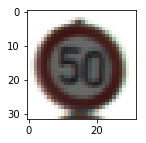

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
index = random.randint(0, len(X_train))
image = X_train[index]

#select a random image from the training set and visualize it
plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index]) # label of the image

### Training Data Distribution 

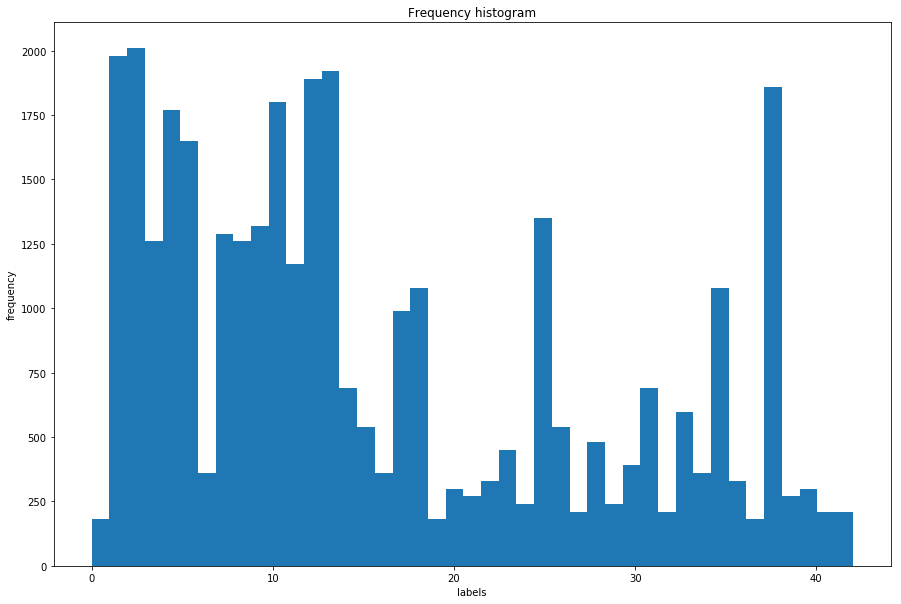

In [5]:
# histogram for labels
plt.figure(figsize=(15,10))
plt.hist(y_train, bins=n_classes, histtype='bar', align='mid', orientation='vertical')
plt.title("Frequency histogram")
plt.xlabel("labels")
plt.ylabel("frequency")
plt.show()


### Test Data Distribution

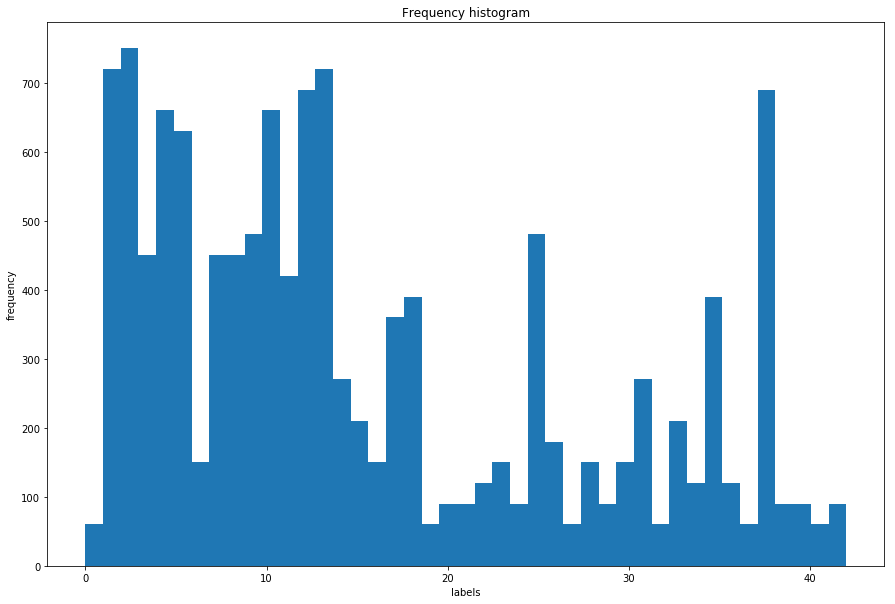

In [6]:
# histogram for labels
plt.figure(figsize=(15,10))
plt.hist(y_test, bins=n_classes, histtype='bar', align='mid', orientation='vertical')
plt.title("Frequency histogram")
plt.xlabel("labels")
plt.ylabel("frequency")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

X train (34799, 32, 32)
34799
X_train modified (34799, 32, 32, 1)
X_test modified (34799, 32, 32, 1)


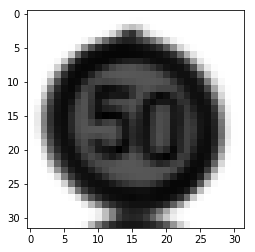

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Grayscaling
import cv2  #bringing in OpenCV libraries
X_trainGray = np.zeros(shape = [X_train.shape[0],X_train.shape[1],X_train.shape[2]], dtype = np.int32)
for i in range(n_train):
    X_trainGray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)

X_testGray = np.zeros(shape = [X_test.shape[0],X_test.shape[1],X_test.shape[2]], dtype = np.int32)
for i in range(n_test):
    X_testGray[i] = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
    
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print("X train", X_trainGray.shape)
plt.imshow(gray, cmap='gray')

print(len(X_trainGray))
X_trainGray = np.expand_dims(X_trainGray, axis=3)
X_testGray = np.expand_dims(X_testGray, axis=3)
print("X_train modified", X_trainGray.shape)
print("X_test modified", X_trainGray.shape)

255 27
1.9921875 0.0234375
-0.360021574031
-0.365019658588
Original shape: (34799, 32, 32, 3)
Normalized shape: (34799, 32, 32, 1)


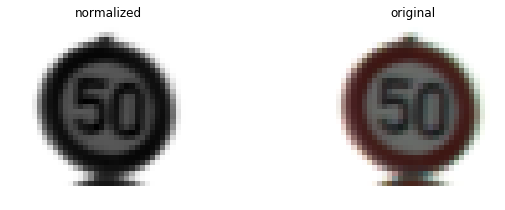

In [8]:
#Normalizing
print(np.amax(gray), np.amin(gray))
X_train_normalized = (X_trainGray - 128)/128 
X_test_normalized = (X_testGray - 128)/128
gray_norm = (gray - 128)/128
print(np.amax(gray_norm), np.amin(gray_norm))

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[index].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[index].squeeze(), cmap='gray')

In [9]:
# Shuffle data
from sklearn.utils import shuffle
X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

### Question 1
_Describe how you preprocessed the data. Why did you choose that technique?_

#### Answer:
The preprocessing of the data is comprised of 3 steps:
1. Grayscaling: to reduce the training time as the colors appear to be not so significant on observing the shape of the traffic sign.
2. Normalizing: The data is normalized to the range of [-1,1]. The aim of this operation is to increase the convergence rate (or ensure non-oscillating behavior) in gradient based algorithms. 
3. Shuffling: Data is shuffled to avoid batches to be biased.

### Split Data into Training, Validation and Testing Sets

In [10]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# We set the 20% of the training set as the validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)
print('The size of training set:',len(X_train))
print('The size of validation set:',len(X_validation))
print('The size of test set:',len(X_test))

The size of training set: 27839
The size of validation set: 6960
The size of test set: 12630


### Question 2 
_Describe how you set up the training, validation and testing data for your model._

#### Answer:
The training and the test data was already provided with the project. However, to get the best estimation rate at the test dataset, we should avoid overfitting. Therefore, I allocated 20% of the initial training set as validation dataset. 

### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 256

# LeNet Lab
We have chosen the _LeNet Architecture_ as it is suitable for our image classification.
![LeNet Architecture](lenet.png)
Source: Yan LeCun

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0 # mean
    sigma = 0.1 # std deviation
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(32-28+1, 32-28+1, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    print("layer 1 shape:",conv1.get_shape())
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(14-10+1, 14-10+1, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    print("layer 2 shape:",conv2.get_shape())
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv2 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(conv2, fc1_W)+fc1_b
    print("layer 3 shape:",fc1.get_shape())
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Additional: Dropout
    dp1 = tf.nn.dropout(fc1, dp_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(dp1, fc2_W)+fc2_b
    print("layer 4 shape:",fc2.get_shape())
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Additional: Dropout
    dp2 = tf.nn.dropout(fc2, dp_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev=sigma))
    logits_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dp2, logits_W)+logits_b
    print("layer 5 shape:",logits.get_shape())
    
    return logits


### Question 3
_Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model._

I used the Lenet Architecture provided for the Traffic Sign Classifier quizzes. The LeNet Architecture could be summarized as:

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Normalized and Grayscaled				|
| Convolution 5x5     	| 1x1 stride, valid padding, output: 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  output: 14x14x6 				    |
| Convolution 5x5	    | 1x1 stride, valid padding, output: 10x10x16   |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  output: 5x5x6 				    |
| Flatten               | Flatten the dataset, output:400               |
| Fully connected		| output: 120        							|
| RELU					|												|
| Dropout				| dropout rate: 0.5								|
| Fully connected		| output: 84  									|
| Dropout				| dropout rate: 0.5								|
| Fully connected		| output: n_classes = 43 						|

The code for my final model is located in the seventh cell of the ipython notebook. 


## Features and Labels
Train LeNet to classify _Traffic Sign Dataset_.

First we need to reset the graph.
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
Then one_hot encode the data for the ease of classification.
e.g.
0 -> [0,0,0,1]

1 -> [0,0,1,0]

2 -> [0,1,0,0]

3 -> [1,0,0,0]

...

In [13]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dp_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

## Training Pipeline
Create a training pipeline that uses the model to classify Road Signs data.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer 2 shape: (?, 10, 10, 16)
layer 3 shape: (?, 120)
layer 4 shape: (?, 84)
layer 5 shape: (?, 43)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dp_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dp_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.393

EPOCH 2 ...
Validation Accuracy = 0.621

EPOCH 3 ...
Validation Accuracy = 0.790

EPOCH 4 ...
Validation Accuracy = 0.834

EPOCH 5 ...
Validation Accuracy = 0.875

EPOCH 6 ...
Validation Accuracy = 0.897

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.922

EPOCH 9 ...
Validation Accuracy = 0.936

EPOCH 10 ...
Validation Accuracy = 0.945

EPOCH 11 ...
Validation Accuracy = 0.944

EPOCH 12 ...
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Accuracy = 0.957

EPOCH 14 ...
Validation Accuracy = 0.962

EPOCH 15 ...
Validation Accuracy = 0.957

EPOCH 16 ...
Validation Accuracy = 0.963

EPOCH 17 ...
Validation Accuracy = 0.969

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.971

EPOCH 20 ...
Validation Accuracy = 0.973

EPOCH 21 ...
Validation Accuracy = 0.973

EPOCH 22 ...
Validation Accuracy = 0.973

EPOCH 23 ...
Validation Accuracy = 0.976

EPOCH 24 ...
Validation Accura

### Question 4
_Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate._
#### Answer:
I did the training one cell above. The accuracy for the validation dataset is about 98.2%.
Here are the settings that I used for the training:
1. Optimized: Adam
2. Number of Epochs: 30 (It could be more but I tweak to avoid overfitting)
3. Batch Size: 256
4. Dropout percentage: 50% (I have searched for the other examples, and the most commonn keeping probability for the weights in the dropout session was 50%. I used and it worked.)
5. Learning Rate: 1e-3


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
​
Be sure to only do this once!
​
If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.
​

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_testGray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.921


### Question 5
_Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem._
#### Answer:
My approach is to use the Lenet Architecture directly to the Traffic Sign Classification process. I wish I had more time to test other architectures such as AlexNet, however, I choose to use LeNet for ease and tweak the hyper-parameters with trial and error without writing script to optimize hyper-parameters systematically. Therefore, there is a little misalignment betweeen the validation dataset accuracy scores (98%) and the test dataset accuracy  scores (91%).

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['./traffic-signs/p0_resized.jpg', './traffic-signs/p1_resized.jpg', './traffic-signs/p2_resized.jpg', './traffic-signs/p3_resized.jpg', './traffic-signs/p4_resized.jpg', './traffic-signs/p5_resized.jpg', './traffic-signs/p6_resized.jpg', './traffic-signs/p7_resized.jpg', './traffic-signs/p8_resized.jpg', './traffic-signs/p9_resized.jpg']
./traffic-signs/p0_resized.jpg
(32, 32, 3)
./traffic-signs/p1_resized.jpg
(32, 32, 3)
./traffic-signs/p2_resized.jpg
(32, 32, 3)
./traffic-signs/p3_resized.jpg
(32, 32, 3)
./traffic-signs/p4_resized.jpg
(32, 32, 3)
./traffic-signs/p5_resized.jpg
(32, 32, 3)
./traffic-signs/p6_resized.jpg
(32, 32, 3)
./traffic-signs/p7_resized.jpg
(32, 32, 3)
./traffic-signs/p8_resized.jpg
(32, 32, 3)
./traffic-signs/p9_resized.jpg
(32, 32, 3)
(10, 32, 32, 1)


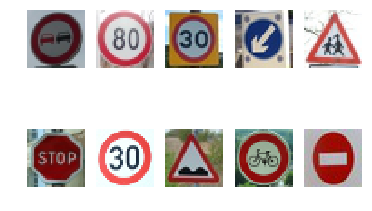

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

fig, axs = plt.subplots(2,5)
axs = axs.ravel()

images = []
image_files  = ['./traffic-signs/' + image_file for image_file in os.listdir('traffic-signs')]
print(image_files)

for i in range(len(image_files)):
    print(image_files[i])
    image = cv2.imread(image_files[i])
    print(image.shape)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(image)
    images.append(image)
    
# plt.imshow(images[0])

images = np.asarray(images, dtype='uint8')

# grayscaling
images_gray = np.sum(images/3, axis=3, keepdims=True)

# normalization
images_norm = (images_gray - 128)/128 

print(images_norm.shape)

# willdelete.py


### Question 6
_Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify._
#### Answer:
As it is quite impossible to find German traffic sign images without any copyrights or copyright shade on the web. The ones I have provide are not quite German traffic signs but traffic signs over the world. I assume that I have labeled the correctly. However, I am also not 100% sure that I am using the right label for each self-found image.

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

ylabel = [9, 5, 1, 39, 28, 14, 1, 22, 29, 17]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(images_norm, ylabel)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.700


### Question 7
_Discuss the model’s predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the “Stand Out Suggestions” part of the rubric)._
#### Answer
The neural network predicted the correct result of the images at the validation, test and external traffic sign dataset with 98%, 91% and 70%, respectively. I believe that it is a good result at validation and test set, but maybe because of overfitting or the fact that new images are not German traffic signs, the neural network could not predict with a high confidence rate such as 80 % or more. I believe that it could be tested with less epochs to check if the predictions at the new images are more accurate. 

### Analyze Performance and Output Top 3 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenet


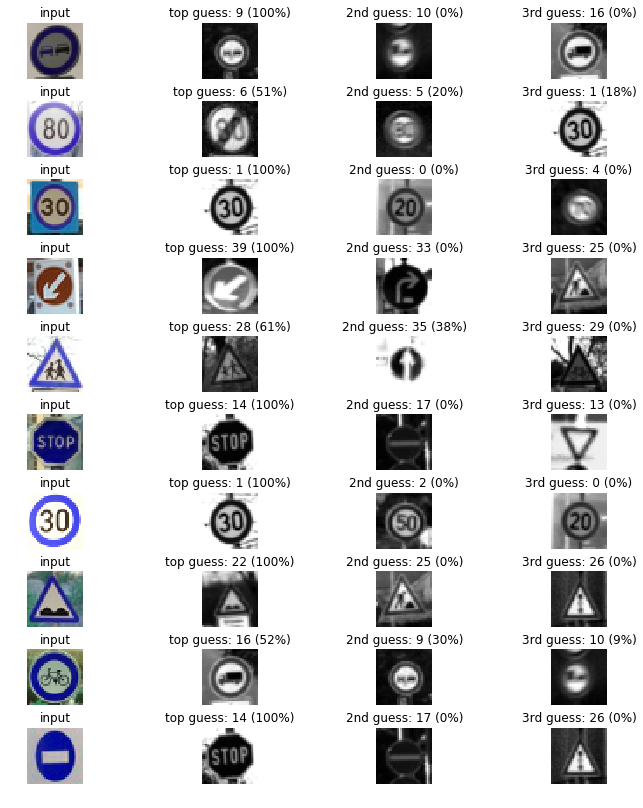

In [20]:
### Calculate the accuracy for these 10 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax = sess.run(softmax_logits, feed_dict={x: images_norm, dp_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: images_norm, dp_prob: 1.0})

    fig, axs = plt.subplots(len(images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Question 8
_Describe how certain the model is when predicting on each of the ten new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 3 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the “Stand Out Suggestions” part of the rubric, visualizations can also be provided such as bar charts)_
#### Answer
You can see the 3 softmax probabilities for each of the ten new external images. As it can be seen 70% of the new images predicted correctly. WHen we look in detail we can observe that some numbers at the speed limits are confused with similar number, i.e. 30 is guessed to be 80. Also the resolution of the bicycle pattern is not enough to capture the shape therefore, it is also one of the most problematic of the new images. The other problematic one is the last sign (no entry sign). The image taken from a website does not cover the circle entirely like the German no entry sign. Therefore, it is mostly misinterpreted as STOP sign.  

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 